# Глубинное обучение в анализе графовых данных, ПМИ ВШЭ

## Семинар 1

В этом ноутбуке будем работать с двумя библиотеами: [NetworkX](https://networkx.org/documentation/stable/) и [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/).

Пока в PyTorch Geometric вам еще не нужно понимать все детали. Концепции и реализации графовой нейронной сети будут рассмотрены в будущем.

## NetworkX

NetworkX — один из наиболее часто используемых пакетов для создания, манипулирования и анализа графов. Библиотека предоставляет несколько классов для хранения и создания различных типов графов, как ориентированных так и неориентированных.

In [1]:
import networkx as nx
G = nx.Graph()

### Работа с вершинами графа

In [2]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 5, 'label': 0}


In [3]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
    print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


### Работа с ребрами графа

In [4]:
# add edges using similar methods
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)
G.add_edges_from([(1, 2), (1, 3)])
# add a group of nodes at once
H = nx.path_graph(10)
G.add_edges_from(H.edges())

In [5]:
# access graph edges
G[1]

AtlasView({2: {}, 3: {}, 0: {}})

In [6]:
# set an attribute of an edge
G.add_edge(1,3)
G[1][3]['color'] = 'blue'

In [7]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adjacency():
    for nbr, eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5: print('(%d, %d, %.3f)' % (n, nbr, data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [8]:
# graph attribte
Gr = nx.Graph(day='Friday')
Gr.graph

{'day': 'Friday'}

In [9]:
# modifying an attribute
Gr.graph['day'] = 'Monday'
Gr.graph

{'day': 'Monday'}

### Степени вершин и соседи

In [10]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
    print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 3
Node 1 has neighbor 2
Node 1 has neighbor 3
Node 1 has neighbor 0


In [11]:
# directed graph
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2 ,0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [12]:
DG.degree(1, weight='weight')

1.25

In [13]:
# convert to undirected graph
H = nx.Graph(G)

### Визуализация графа

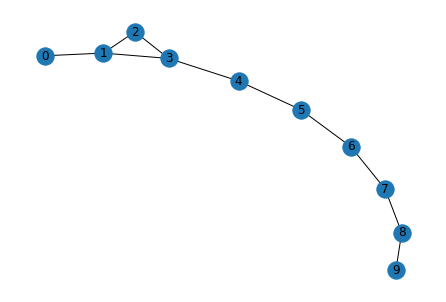

In [14]:
# basic graph drawing capability
nx.draw(G, with_labels=True)

(0, 0) (1, 0) (0, 1)
(0, 1) (1, 1) (0, 2)
(0, 2) (1, 2) (0, 3)
(0, 3) (1, 3) (0, 4)
(0, 4) (1, 4)
(1, 0) (2, 0) (1, 1)
(1, 1) (2, 1) (1, 2)
(1, 2) (2, 2) (1, 3)
(1, 3) (2, 3) (1, 4)
(1, 4) (2, 4)
(2, 0) (3, 0) (2, 1)
(2, 1) (3, 1) (2, 2)
(2, 2) (3, 2) (2, 3)
(2, 3) (3, 3) (2, 4)
(2, 4) (3, 4)
(3, 0) (4, 0) (3, 1)
(3, 1) (4, 1) (3, 2)
(3, 2) (4, 2) (3, 3)
(3, 3) (4, 3) (3, 4)
(3, 4) (4, 4)
(4, 0) (4, 1)
(4, 1) (4, 2)
(4, 2) (4, 3)
(4, 3) (4, 4)
(4, 4)


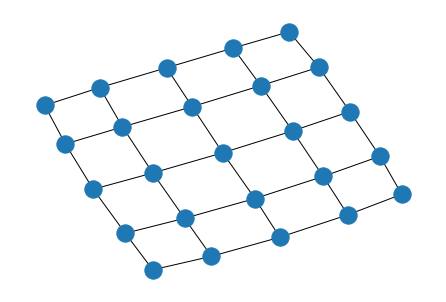

In [16]:
import matplotlib.pylab as plt


G = nx.grid_2d_graph(5, 5)  # 5x5 grid

# print the adjacency list
for line in nx.generate_adjlist(G):
    print(line)
# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

pos = nx.spring_layout(H, seed=42)
nx.draw(H, pos)
plt.show()

[Здесь](https://networkx.org/documentation/stable/) можно изучить дополнительный функционал NetworkX.

## PyTorch Geometric

PyTorch Geometric — библиотека расширений для PyTorch, которая позволяет использовать различные методы для разработки и обучения графовых нейронных сетей, утилит, упрощающих реализацию сетей и большое количество наборов данных.

In [17]:
# Install torch geometric
# !pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
# !pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
# !pip install -q torch-geometric

     |████████████████████████████████| 2.1 MB 4.5 MB/s 
     |████████████████████████████████| 467 kB 4.4 MB/s 


### Визуализация

In [17]:
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

### Введение

Рассмотрим простой пример графа, [**Zachary's karate club network**]( https://en.wikipedia.org/wiki/Zachary%27s_karate_club). Этот граф описывает социальную сеть из 34 членов клуба карате и показывает связи между участниками, которые общались вне клуба. Здесь нас интересует обнаружение сообществ, возникающих в результате взаимодействия участников.

In [19]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


После инициализации набора данных сначала можем проверить некоторые его свойства.
Например, видно, что этот набор данных содержит ровно один граф, и что каждому узлу в этом наборе данных соответствует **34-мерный вектор признаков**, который описывает членов клуба карате. Кроме того, граф содержит ровно **4 класса**, которые представляют собой сообщества, к которому принадлежит каждый узел.

In [20]:
data = dataset[0]

print(data)
print('==============================================================')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {(2*data.num_edges) / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 9.18
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [21]:
data.edge_index.T

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

Каждый граф в PyTorch Geometric представлен одним объектом [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data), который содержит всю информацию для его графического представления.
```
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```
Мы видим, что объект `data` содержит 4 атрибута:
(1) Свойство `edge_index` содержит информацию о **связности графа**, *т.е.* кортеж индексов исходного и целевого узлов для каждого ребра.
PyG также ссылается на (2) **функции узлов** как `x` (каждому из 34 узлов назначается 34-мерный вектор признаков) и (3) **метки узлов** как `y` (каждый из узлов относится ровно к одному классу).
(4) Также существует дополнительный атрибут, называемый `train_mask`, который описывает, для каких узлов мы уже знаем их сообщества.
Нам известна информация о принадлежности к сообществам только у 4 узлов, и задача состоит в том, чтобы найти сообщества для остальных узлов.

Объект `data` также предоставляет некоторые функции для определения основных свойств лежащего в основе графа.
Например, мы можем легко сделать вывод, существуют ли в графе изолированные узлы (не существует ни одного ребра ни для одного узла), содержит ли граф циклы (*т.е.*, $(v, v) \in \mathcal {E}$), или является ли граф неориентированным (для каждого ребра $(v, w) \in \mathcal{E}$ также существует ребро $(w, v) \in \mathcal{ Е}$).

In [22]:
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [23]:
edge_index = data.edge_index
print(edge_index.t())

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

Мы можем видеть, что для каждого ребра `edge_index` содержит кортеж из двух индексов узлов, где первое значение описывает индекс узла исходного узла, а второе значение описывает индекс узла целевого узла ребра.

Это представление известно как **формат COO (coordinate format)**, обычно используемый для представления разреженных матриц.
Вместо того, чтобы хранить информацию о смежности в плотном представлении $\mathbf{A} \in \{ 0, 1 \}^{|\mathcal{V}| \times |\mathcal{V}|}$, PyG представляет графы разреженно, что означает хранение только тех координат/значений, для которых записи в $\mathbf{A}$ отличны от нуля.

Мы можем дополнительно визуализировать график, преобразовав его в формат библиотеки `networkx`, который реализует, помимо функций манипулирования графами, инструменты для визуализации:

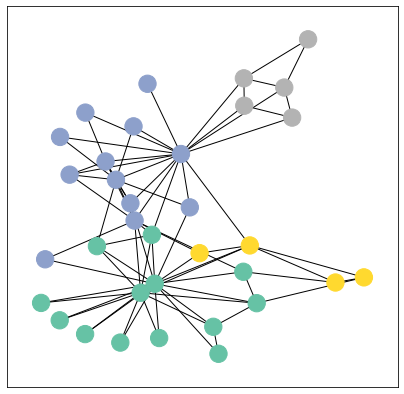

In [24]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

## Реализация графовой нейронной сети (GNN)

Узнав об обработке данных в PyG, пришло время реализовать первую графовую нейронную сеть

Для этого будем использовать один из самых простых операторов GNN, **слой GCN** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)).

PyG реализует этот слой через [`GNCConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GNCConv), который можно выполнить, передав вектор признаков узла `x` и матрицу представлений связности графа `edge_index`.

### Что хотим получить на выходе GNN

Цель GNN состоит в том, чтобы взять входной граф $G = (\mathcal{V}, \mathcal{E})$, где каждый узел $v_i \in \mathcal{V}$ имеет входной вектор признаков $X_i^{ (0)}$. Мы хотим обучить функцию $f \to \mathcal{V} \times \mathcal{R}^d$, функцию, которая принимает узел и его вектор признаков, а также структуру графа и выводит его эмбединг, вектор, представляющий этот узел таким способом, который будем использовать для последующей задачи. После того, как сопоставили узлы и их начальные представления с их изученными эмбедингами, мы можем использовать эти представления для выполнения множества различных задач, включая регрессию/классификацию на уровне вершин, на уровне ребер или на уровне графа.

В этом ноутбуке мы хотим получить эмбединги, которые будут полезны для классификации каждой вершины в ее сообществе.

Теперь мы готовы создать первую графовую нейронную сеть, определив нашу архитектуру в классе torch.nn.Module:

In [30]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import torch.nn.functional as F


class GCN(torch.nn.Module):
    def __init__(self, num_layers, input_dim, hidden_dim):
        super().__init__()
        torch.manual_seed(42)
        self.num_layers = num_layers
        self.classifier = Linear(hidden_dim, dataset.num_classes)

        self.convs = torch.nn.ModuleList()

        self.convs.append(GCNConv(input_dim, hidden_dim))
        for l in range(num_layers-1):
            self.convs.append(GCNConv(hidden_dim, hidden_dim))

    def forward(self, x, edge_index):

        for l in range(self.num_layers - 1):
            x = self.convs[l](x, edge_index)
            x = x.tanh()
    
        # h = F.relu(x)
        # h = F.dropout(h, p=0.3, training=self.training)
        h = self.convs[-1](x, edge_index)
        embeddings = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(embeddings)

        return out, embeddings

model = GCN(3, dataset.num_features, 4)
print(model)

GCN(
  (classifier): Linear(in_features=4, out_features=4, bias=True)
  (convs): ModuleList(
    (0): GCNConv(34, 4)
    (1): GCNConv(4, 4)
    (2): GCNConv(4, 4)
  )
)


Здесь мы сначала в `__init__` инициализируем все наши блоки сети и в `forward` определяем поток вычислений сети.
Сначала мы определяем и складываем **`num_layers` свертки графа**. Каждый слой соответствует агрегированию информации из соседей первого уровня каждой вершины (его непосредственных соседей), но когда мы объединяем слои вместе, мы можем агрегировать информацию уже из соседей 3го уровня и так далее.

Кроме того, слои `GNCConv` уменьшают размерность объектов вершин до $4$, $34 \rightarrow 4 \rightarrow 4 \rightarrow ... \rightarrow 4$. После каждого слоя `GNCConv` идет активация функцией [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh).

После этого применяем одно линейное преобразование ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)) которое используется как классификатор для сопоставления вершин с одним из 4 классов/сообществ.

Далее возвращаем выходные данные классификатора и итоговые представления узлов.

Embedding shape: [34, 4]


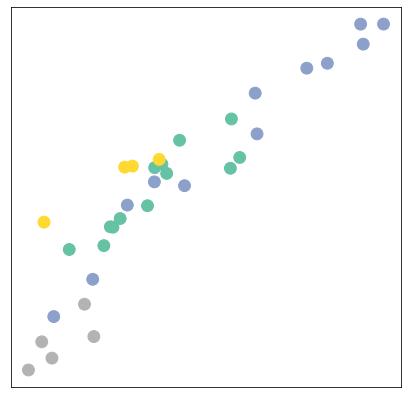

In [31]:
model = GCN(2, dataset.num_features, 4)

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

Примечательно, что даже до обучения весов нашей модели, сеть создает представления вершин, которое очень похоже на структуру-сообществ графа.
Вершины одного цвета (сообщества) уже тесно сгруппированы в пространстве эмбедингов, хотя веса нашей модели инициализируются **случайным образом**, и мы пока не проводили никакого обучения
Это приводит к выводу, что GNN вносят смещение к аналогичным представлениям для вершин, которые находятся близко друг к другу во входном графе.

### Тренировка в сети клубов каратэ

Но можем ли мы сделать лучше? Давайте рассмотрим пример, как обучить нашу сеть, основываясь на знании о взаимосвязях сообществ

Поскольку все в нашей модели дифференцируемо и параметризовано, мы можем добавить несколько лэйблов, обучить модель и посмотреть, что получается с эмбедингами.
Здесь мы используем semi-supervised подход: мы просто тренируемся на одном узле для каждого класса, но нам разрешено использовать полные данные нашего графа.

Обучение нашей модели очень похоже на любую другую модель PyTorch.
В дополнение к определению нашей сетевой архитектуры мы определяем функцию потерь ([`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)) и инициализируем стохастический градиент оптимизатор ([`Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)).
После этого мы выполняем несколько шагов оптимизации, где каждая эпоха состоит из прямого и обратного прохода для вычисления градиентов параметров нашей модели относительно  потерь, полученных после прямого прохода по сети.
Если вы уже пользовались PyTorch, эта схема должна показаться вам знакомой. Также можете изучить PyTorch вводный пример [введение в обучение нейронной сети в PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer ).

Обратите внимание, что наш semi-supervised подход обучения реализуется следующей строкой:
```
loss = criterion(out[data.train_mask], data.y[data.train_mask])
```
Пока мы вычисляем вложения узлов для всех наших узлов, мы используем только обучающие узлы для вычисления потерь.
Здесь это реализовано путем фильтрации выходов классификатора `out` и меток `data.y`, чтобы они содержали только вершины `train_mask`.

Давайте теперь начнем обучение и посмотрим, как наши представления вершин улучшаются с течением времени:

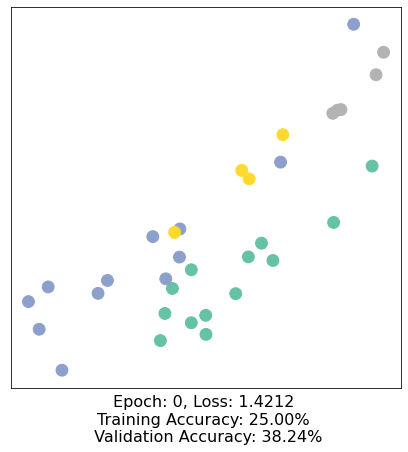

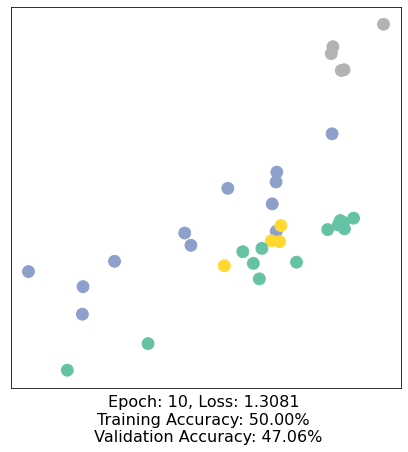

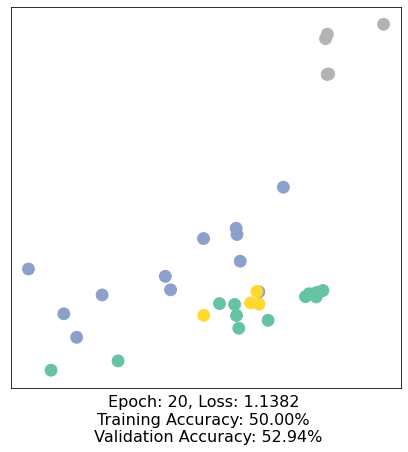

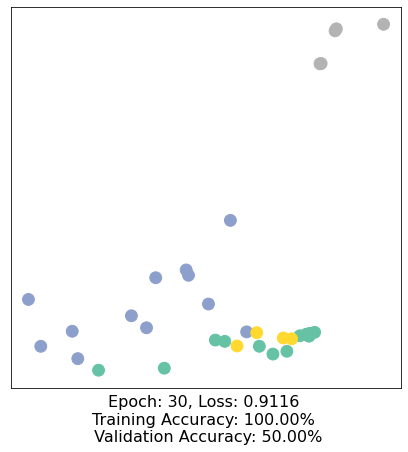

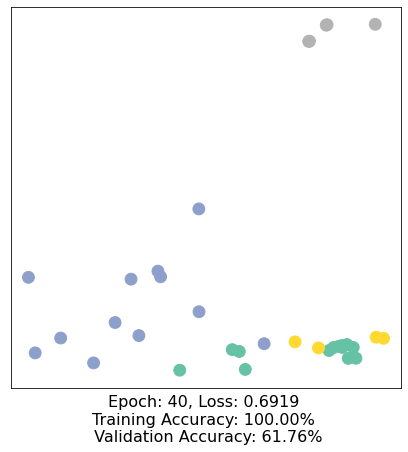

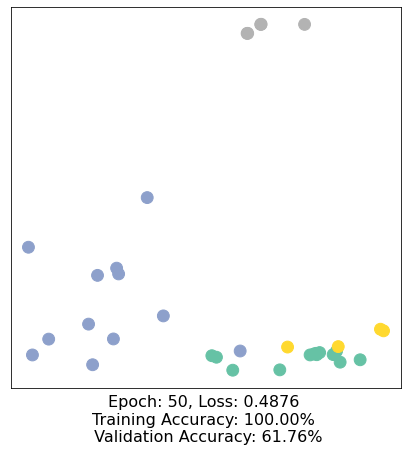

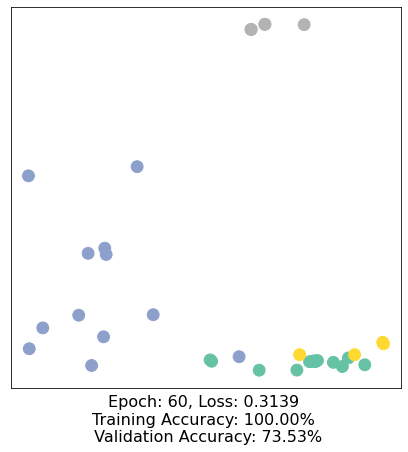

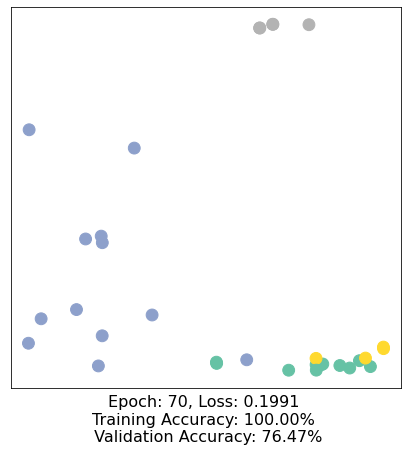

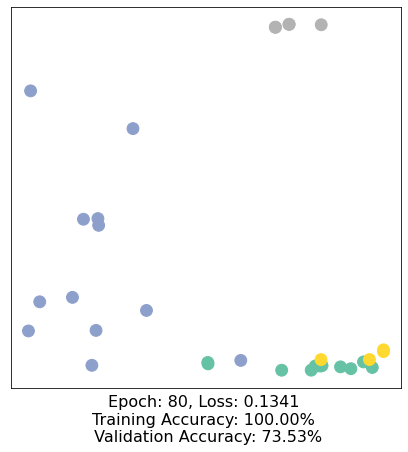

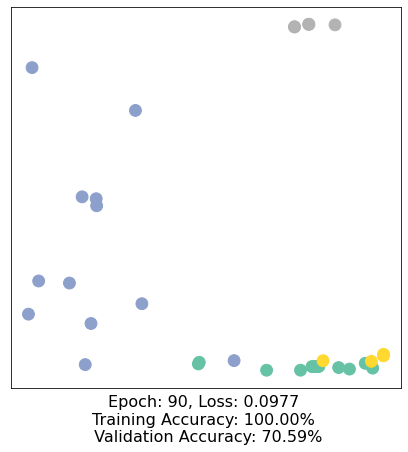

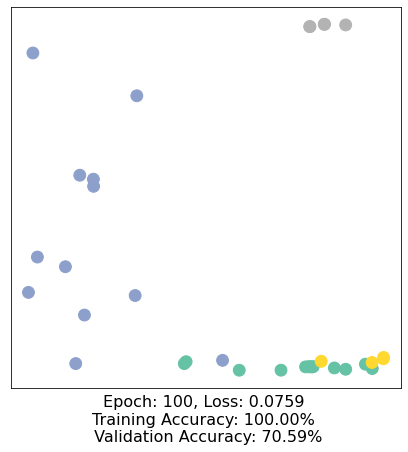

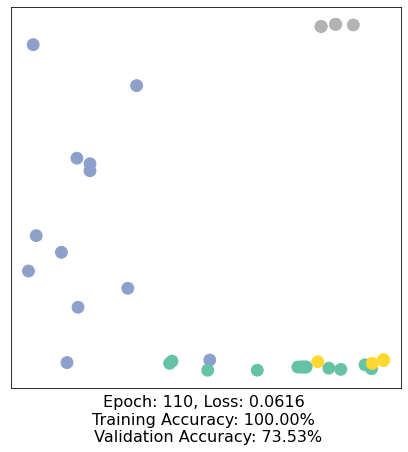

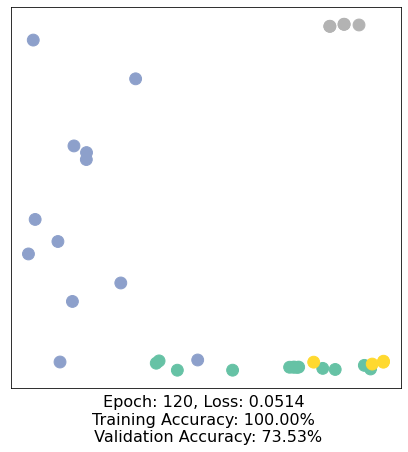

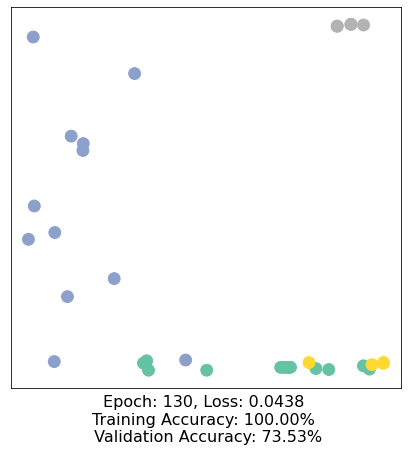

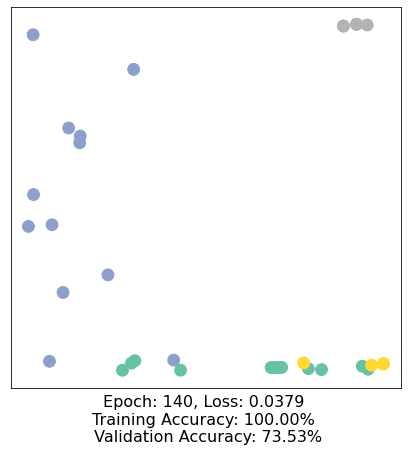

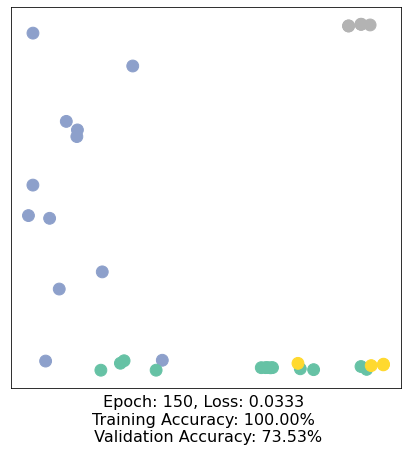

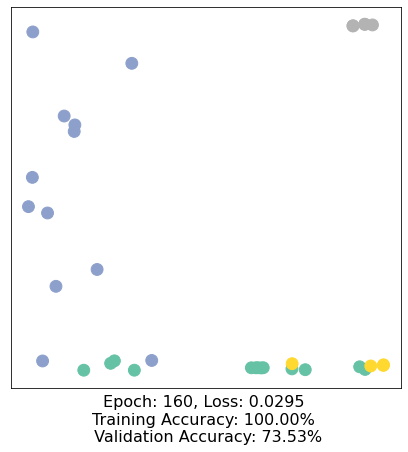

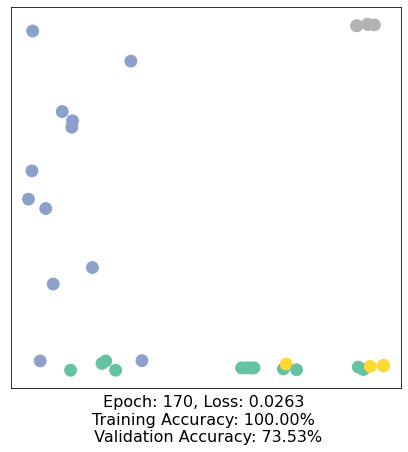

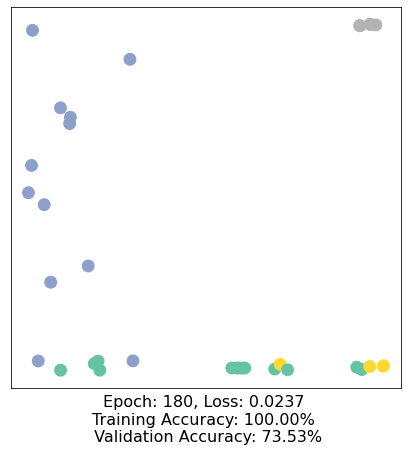

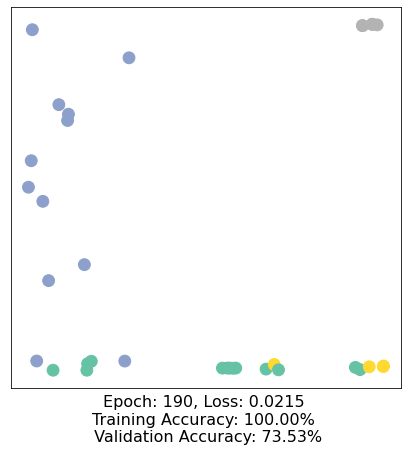

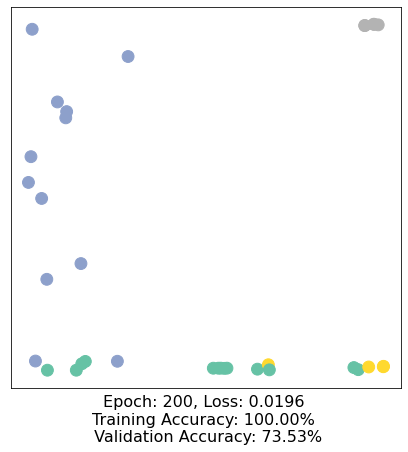

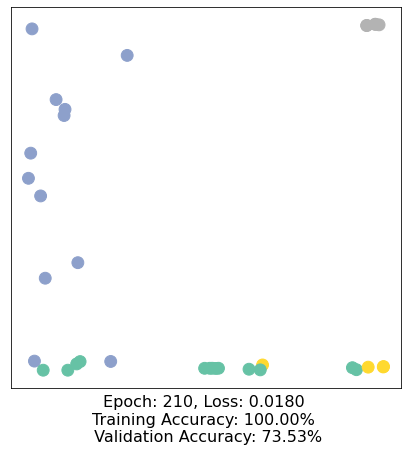

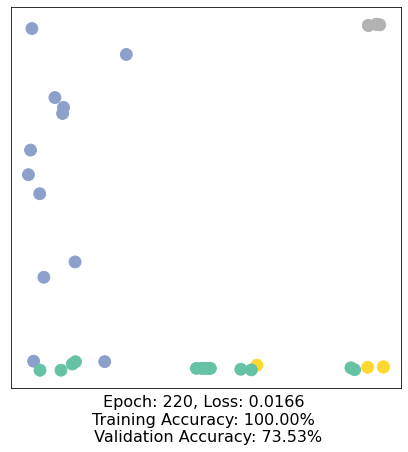

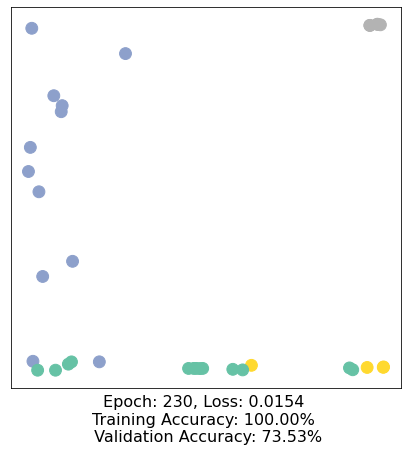

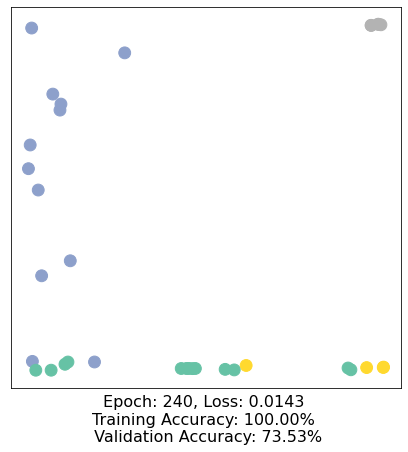

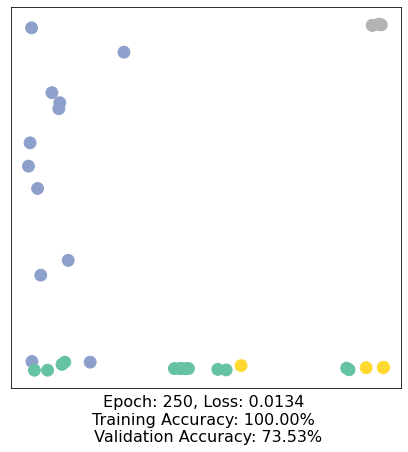

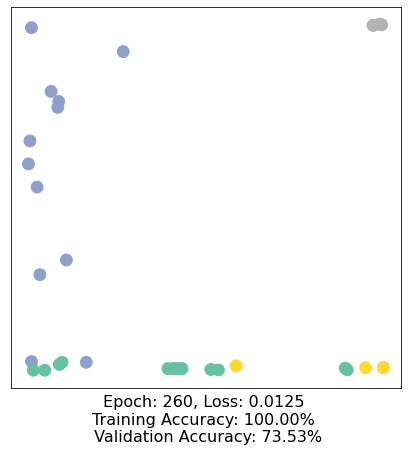

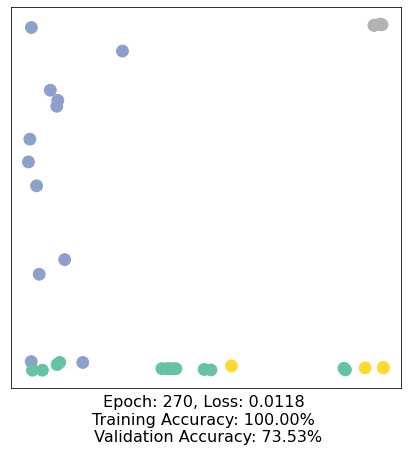

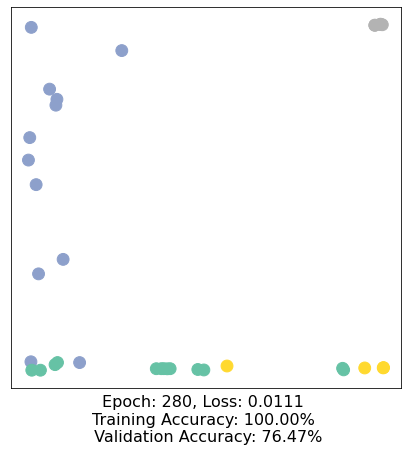

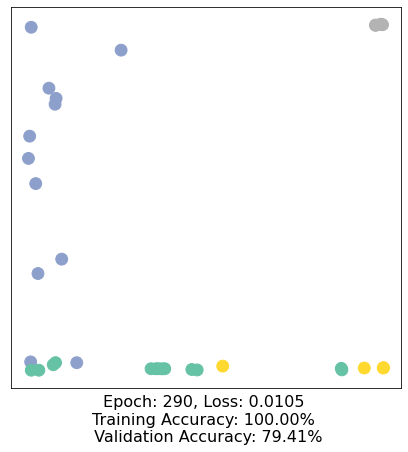

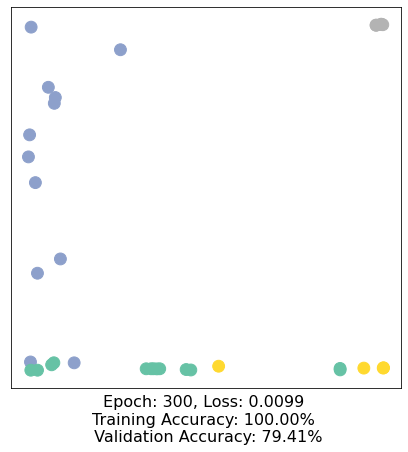

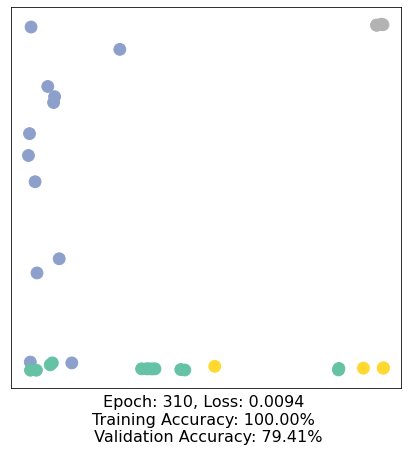

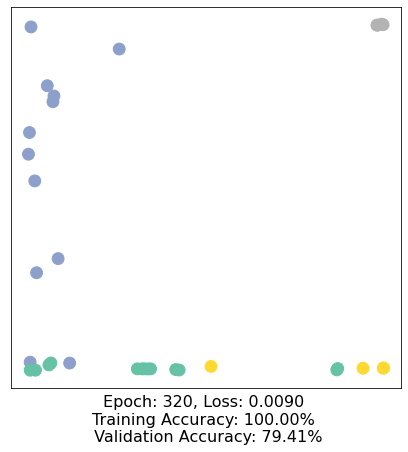

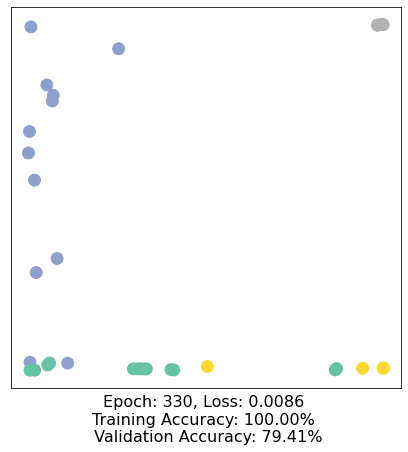

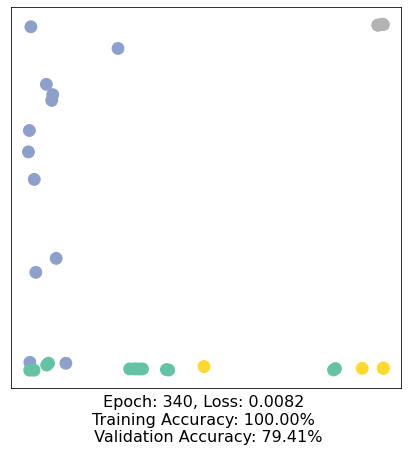

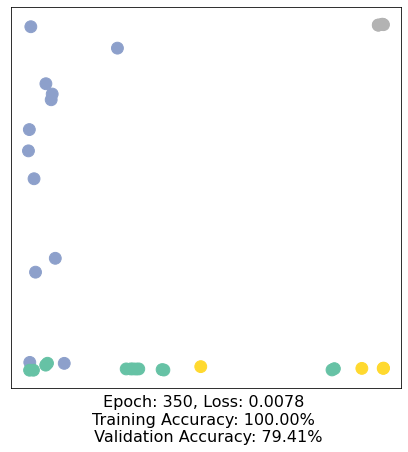

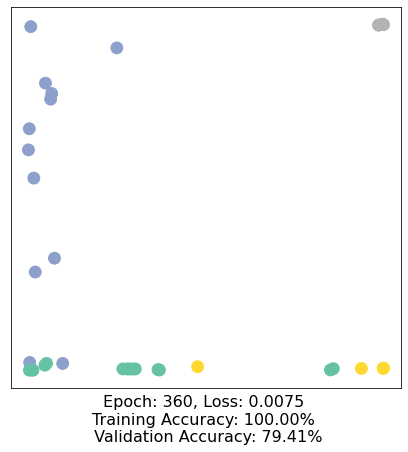

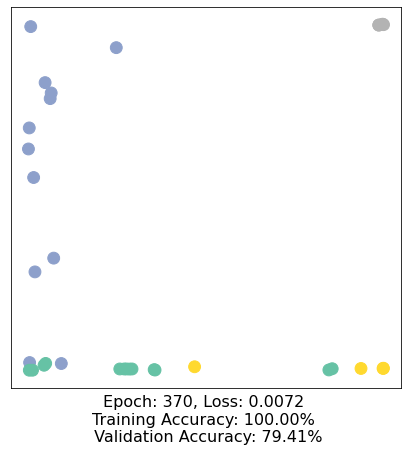

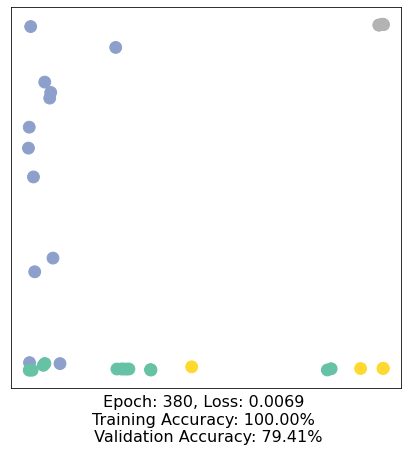

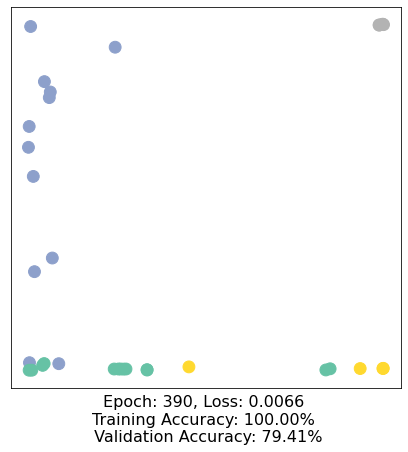

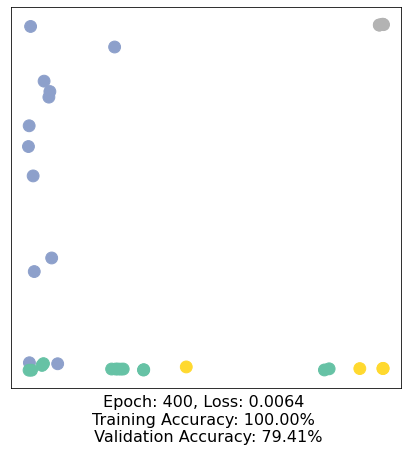

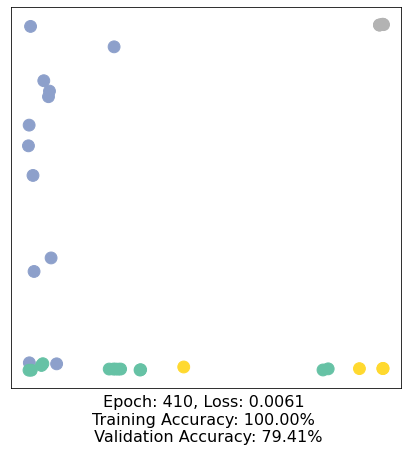

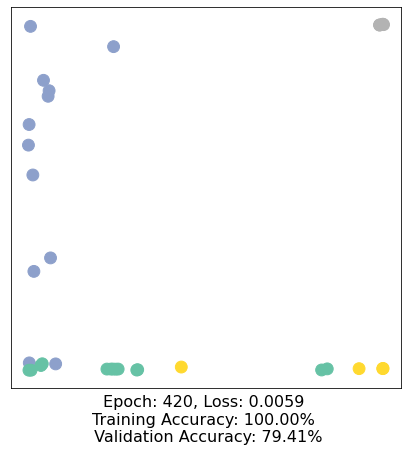

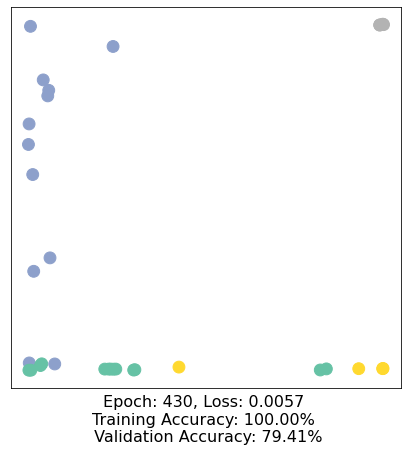

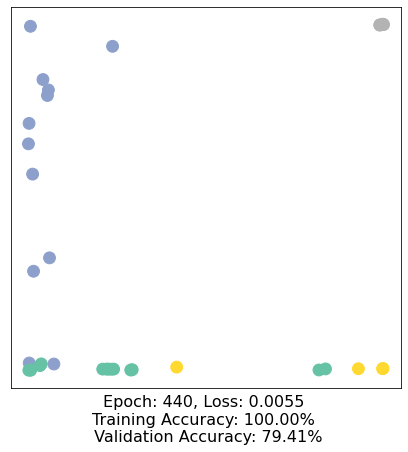

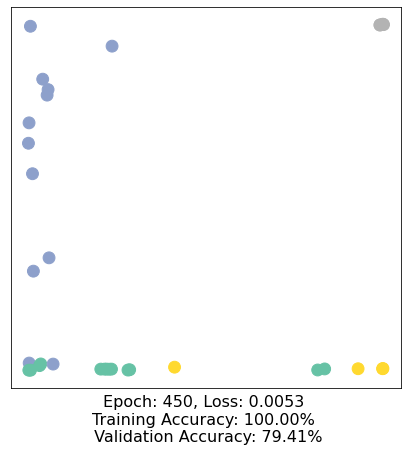

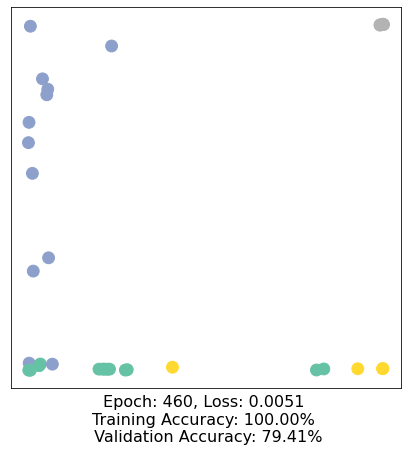

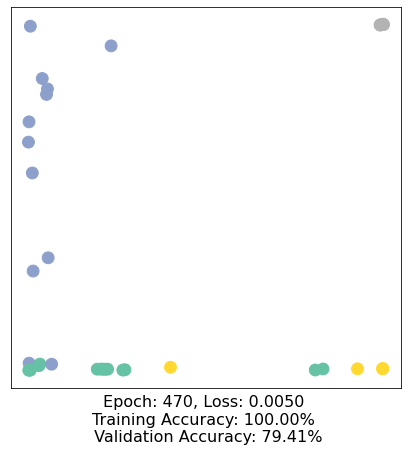

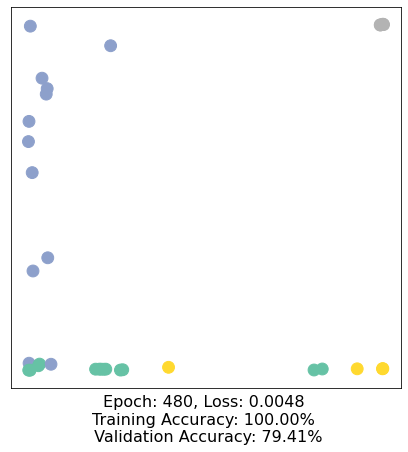

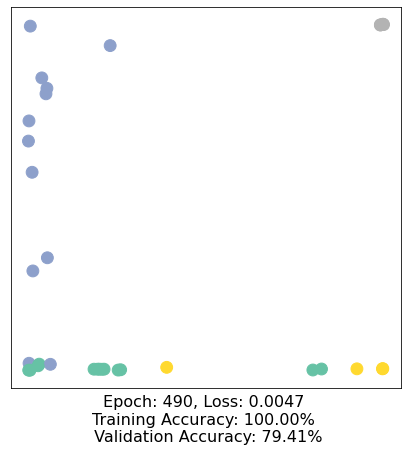

In [32]:
import time


model = GCN(3, dataset.num_features, 4)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.

    accuracy = {}
    # Calculate training accuracy on our four examples
    predicted_classes = torch.argmax(out[data.train_mask], axis=1) # [0.6, 0.2, 0.7, 0.1] -> 2
    target_classes = data.y[data.train_mask]
    accuracy['train'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())
    
    # Calculate validation accuracy on the whole graph
    predicted_classes = torch.argmax(out, axis=1)
    target_classes = data.y
    accuracy['val'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())

    return loss, h, accuracy

for epoch in range(500):
    loss, h, accuracy = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss, accuracy=accuracy)
        time.sleep(0.3)

Как видим, наша трехслойная модель довольно хорошо разделяет сообщества и правильно классифицирует большинство вершин.

Кроме того, мы сделали это с помощью нескольких строк кода благодаря библиотеке PyTorch Geometric.

[Здесь](https://pytorch-geometric.readthedocs.io/en/latest/) вы можете изучить другую функциональность PyG.

In [23]:
# TODO: добавив еще слои в сеть попробовать улучшить качество

### Теперь поработаем с графом документов

Сейчас будем использовать набор данных Cora, который представляет собой сеть цитирования, в которой вершины представляют документы. Каждый узел описывается 1433-мерным вектором признаков набора слов. Два документа связаны, если между ними существует ссылка цитирования. Задача состоит в том, чтобы определить категорию каждого документа (всего 7).
Этот набор данных был впервые представлен [Yang et al. (2016)](https://arxiv.org/abs/1603.08861) в качестве одного из наборов данных набора тестов Planetoid.

In [33]:
from sklearn.manifold import TSNE
import matplotlib.pylab as plt


def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [34]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


В целом, этот набор данных очень похож на ранее использовавшуюся граф [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub).
Мы видим, что сеть «Cora» содержит 2708 узлов и 10 556 ребер, в результате чего средняя степень узла составляет 3,9.
Для обучения этого набора данных нам даются категории из 140 вершин (по 20 для каждого класса).
Это приводит к тому, что для обучения у нас используется 5% размеченных вершин.

Будем использовать **[data transformations](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#data-transforms) via `transform=NormalizeFeatures()`** для нормализации и аугментации данных

Также можно обратить внимание на то, что граф неориентированный и в нем есть изолированные вершины (такой документ имеет только одно упоминание)

### Обучение Multi-layer Perception Network (MLP)

Теоретически, мы должны быть уметь сделать вывод о категории документа исключительно на основе его содержания, т.е. его представления набора слов, без учета какой-либо дополнительной информации.

Давайте проверим это, создав простую полносвязную сеть, которая работает исключительно с признаками входных вершин (используя общие веса для всех узлов):

In [35]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, num_features, num_classes, hidden_size):
        super().__init__()
        torch.manual_seed(42)
        self.lin1 = Linear(num_features, hidden_size)
        self.lin2 = Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(dataset.num_features, dataset.num_classes, 16)
print(model)

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


Далее обучим сеть также как делали ранее

In [38]:
model = MLP(dataset.num_features, dataset.num_classes, 16)

criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

def test():
    model.eval()
    out = model(data.x)
    pred = out.argmax(dim=1)  # Use the class with highest probability.
    test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
    return test_acc

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 001, Loss: 1.9514
Epoch: 002, Loss: 1.9460
Epoch: 003, Loss: 1.9415
Epoch: 004, Loss: 1.9359
Epoch: 005, Loss: 1.9277
Epoch: 006, Loss: 1.9186
Epoch: 007, Loss: 1.9110
Epoch: 008, Loss: 1.9025
Epoch: 009, Loss: 1.8937
Epoch: 010, Loss: 1.8821
Epoch: 011, Loss: 1.8691
Epoch: 012, Loss: 1.8588
Epoch: 013, Loss: 1.8407
Epoch: 014, Loss: 1.8299
Epoch: 015, Loss: 1.8101
Epoch: 016, Loss: 1.8005
Epoch: 017, Loss: 1.7869
Epoch: 018, Loss: 1.7693
Epoch: 019, Loss: 1.7383
Epoch: 020, Loss: 1.7277
Epoch: 021, Loss: 1.7189
Epoch: 022, Loss: 1.6882
Epoch: 023, Loss: 1.6698
Epoch: 024, Loss: 1.6437
Epoch: 025, Loss: 1.6113
Epoch: 026, Loss: 1.5913
Epoch: 027, Loss: 1.5653
Epoch: 028, Loss: 1.5173
Epoch: 029, Loss: 1.5074
Epoch: 030, Loss: 1.4792
Epoch: 031, Loss: 1.4540
Epoch: 032, Loss: 1.4399
Epoch: 033, Loss: 1.3667
Epoch: 034, Loss: 1.3765
Epoch: 035, Loss: 1.3627
Epoch: 036, Loss: 1.3081
Epoch: 037, Loss: 1.2526
Epoch: 038, Loss: 1.2578
Epoch: 039, Loss: 1.2326
Epoch: 040, Loss: 1.2119


In [39]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.4530


Как видно, наш MLP работает довольно плохо с точностью теста всего около 45%.
Но почему MLP не работает лучше?
Основная причина этого заключается в том, что эта модель страдает от сильного переобучения из-за того, что имеет доступ только к небольшому количеству обучающих вершин, и поэтому плохо обобщает невидимые представления вершин.

Кроме того, в модели не учитывается важная информация: цитируемые статьи, скорее всего, связаны с категорией документа.
Именно здесь в игру вступают графические нейронные сети, которые могут помочь повысить качество нашей модели.

In [40]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes, hidden_size):
        super().__init__()
        torch.manual_seed(42)
        self.conv1 = GCNConv(num_features, hidden_size)
        self.conv2 = GCNConv(hidden_size, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.3, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(dataset.num_features, dataset.num_classes, 16)
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


/Users/pavel/miniconda3/envs/M1Max/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pavel/miniconda3/envs/M1Max/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


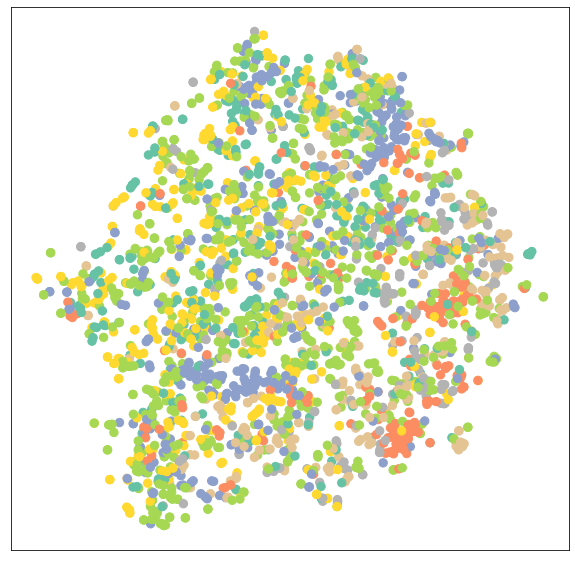

In [41]:
model = GCN(dataset.num_features, dataset.num_classes, 16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [42]:
model = GCN(dataset.num_features, dataset.num_classes, 16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)  # Use the class with highest probability.
    test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
    return test_acc


for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 001, Loss: 1.9456
Epoch: 002, Loss: 1.9383
Epoch: 003, Loss: 1.9291
Epoch: 004, Loss: 1.9160
Epoch: 005, Loss: 1.9021
Epoch: 006, Loss: 1.8911
Epoch: 007, Loss: 1.8774
Epoch: 008, Loss: 1.8631
Epoch: 009, Loss: 1.8435
Epoch: 010, Loss: 1.8320
Epoch: 011, Loss: 1.8183
Epoch: 012, Loss: 1.7959
Epoch: 013, Loss: 1.7734
Epoch: 014, Loss: 1.7510
Epoch: 015, Loss: 1.7300
Epoch: 016, Loss: 1.7175
Epoch: 017, Loss: 1.6930
Epoch: 018, Loss: 1.6530
Epoch: 019, Loss: 1.6309
Epoch: 020, Loss: 1.6211
Epoch: 021, Loss: 1.5895
Epoch: 022, Loss: 1.5635
Epoch: 023, Loss: 1.5374
Epoch: 024, Loss: 1.5086
Epoch: 025, Loss: 1.4876
Epoch: 026, Loss: 1.4543
Epoch: 027, Loss: 1.4250
Epoch: 028, Loss: 1.3986
Epoch: 029, Loss: 1.3665
Epoch: 030, Loss: 1.3339
Epoch: 031, Loss: 1.3093
Epoch: 032, Loss: 1.2720
Epoch: 033, Loss: 1.2392
Epoch: 034, Loss: 1.2154
Epoch: 035, Loss: 1.1787
Epoch: 036, Loss: 1.1382
Epoch: 037, Loss: 1.1103
Epoch: 038, Loss: 1.0883
Epoch: 039, Loss: 1.0398
Epoch: 040, Loss: 1.0157


In [43]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7990


/Users/pavel/miniconda3/envs/M1Max/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pavel/miniconda3/envs/M1Max/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


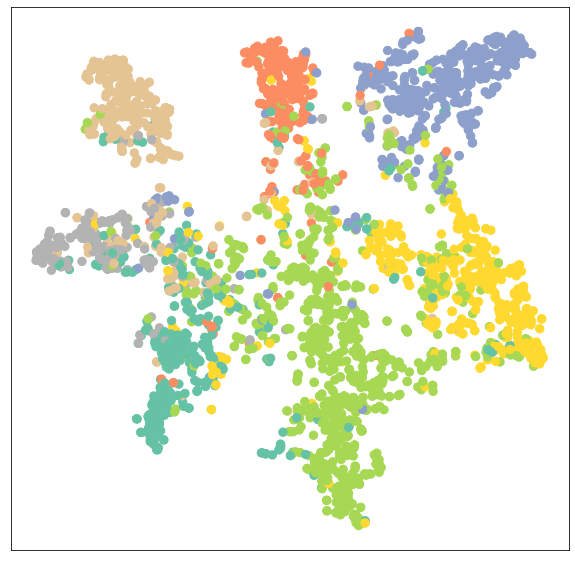

In [44]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

Просто заменив линейные слои слоями GCNConv, мы смогли достичь **80% точности на тестовой выборке**!
Это показывает, что информация об отношении вершин играет важную роль в повышении производительности модели.

Мы также можем убедиться в этом еще раз, взглянув на выходные эмбединги обученной модели, которая теперь показывает гораздо лучшую кластеризацию документов одной и той же категории.

__TODO__

Вы можете попробовать использовать разные слои GNN, чтобы увидеть, как меняется качество модели. Что произойдет, если вы замените все слои `GNCConv` слоями [`GATConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GATConv), которые использовать __attention__? Попробуйте написать двухслойную модель GAT, которая использует 8 голов внимания на первом уровне и 1 голову внимания на втором уровне, использует коэффициент dropout 0,6 внутри и снаружи каждого вызова GATConv, и использует размеры `hidden_size`, равные 8 `на голову`.

In [ ]:
from torch_geometric.nn import GATConv


class GAT(torch.nn.Module):
    def __init__(self, hidden_size, heads):
        super().__init__()
        torch.manual_seed(42)
        self.conv1 = GATConv(...)  # TODO
        self.conv2 = GATConv(...)  # TODO

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GAT(...)
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

def test(mask):
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)  # Use the class with highest probability.
    correct = pred[mask] == data.y[mask]  # Check against ground-truth labels.
    acc = int(correct.sum()) / int(mask.sum())  # Derive ratio of correct predictions.
    return acc


for epoch in range(1, 201):
    loss = train()
    val_acc = test(data.val_mask)
    test_acc = test(data.test_mask)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')